<a href="https://colab.research.google.com/github/Siddhi232001/GRIP-TASK-2/blob/main/TASK_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict the optimum number of clusters and represent it visually**

**K-Means Clustering with Python Scikit Learn**

In this section we will see how the Python Scikit-Learn library can be used to implement simple K-means clustering algorithm in Machine Learning. For the given "IRIS" dataset, predict the number of clusters and represent it visually.

The following code is executed by **Siddhi Kelshikar**.

**STEP 1: Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

**STEP 2: Loading Dataset**

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**STEP 3: Defining Target and Predictors**

In [ ]:
# "x" is a predictor and "y" is a target
x = iris.data[:, :2]
y = iris.target

**STEP 4: Exploring Dataset**

Text(0, 0.5, 'Sepal Width')

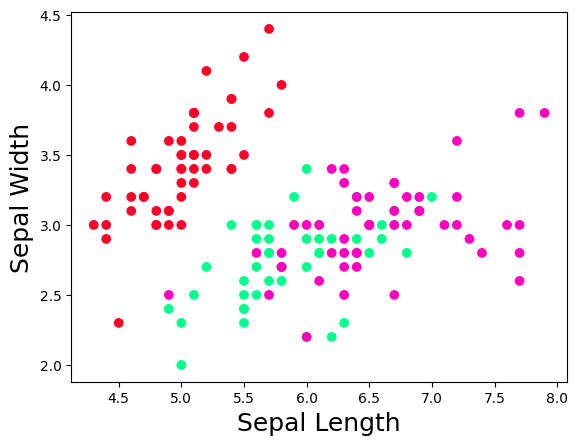

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y, cmap = 'gist_rainbow')
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)

**STEP 5: Finding optimum no. of clusters**

In [ ]:
x = iris_df.iloc[ :, [0,1,2,3]].values
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

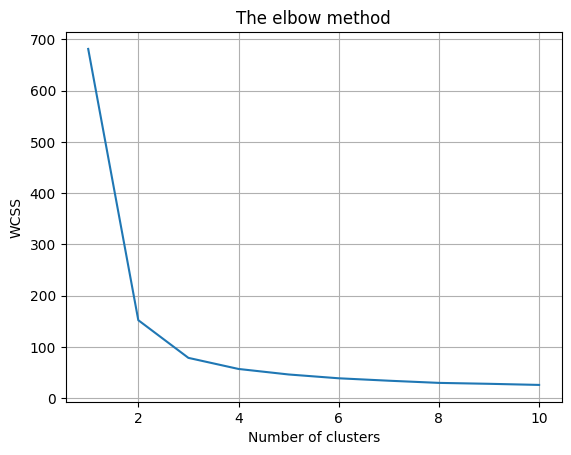

In [ ]:
# Plotting results on graph to observe the elbow
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.grid(True)
plt.show()


**STEP 6: Applying K-Means**

In [ ]:
# Applying K-Means to the dataset / Creating the K-Means classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**STEP 7: Visualizing clusters**

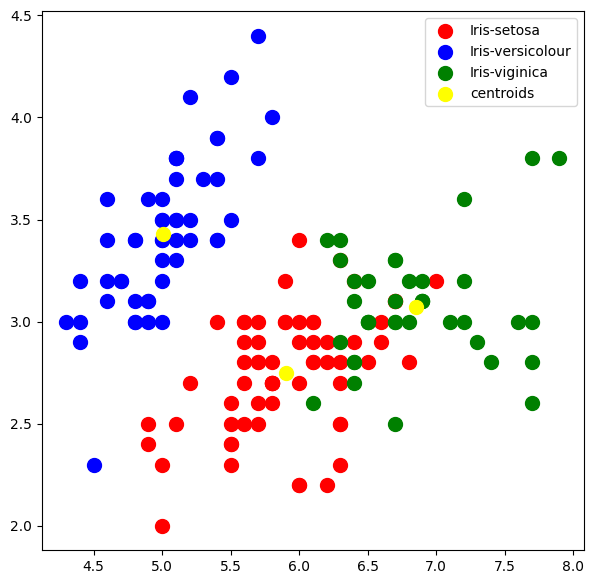

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(7,7))
plt.scatter(x[y_kmeans ==0,0], x[y_kmeans == 0,1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans == 1,1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans == 2,1],
            s = 100, c = 'green', label = 'Iris-viginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'centroids')

plt.legend()